# Importing Necessary Libraries

In [7]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

# Loading the Dataset

In [8]:
disease_df = pd.read_csv("framingham.csv")
print("shape:"  ,disease_df.shape)
disease_df.head()

shape: (4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Lets define X, and y for our dataset

In [9]:
X = np.asarray(disease_df[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']])
X[0:5]

array([[  1.  ,  39.  ,   4.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  , 195.  , 106.  ,  70.  ,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  , 250.  , 121.  ,  81.  ,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  ,   1.  ,  20.  ,   0.  ,   0.  ,   0.  ,
          0.  , 245.  , 127.5 ,  80.  ,  25.34,  75.  ,  70.  ],
       [  0.  ,  61.  ,   3.  ,   1.  ,  30.  ,   0.  ,   0.  ,   1.  ,
          0.  , 225.  , 150.  ,  95.  ,  28.58,  65.  , 103.  ],
       [  0.  ,  46.  ,   3.  ,   1.  ,  23.  ,   0.  ,   0.  ,   0.  ,
          0.  , 285.  , 130.  ,  84.  ,  23.1 ,  85.  ,  85.  ]])

In [11]:
Y = np.asarray(disease_df[['TenYearCHD']])
Y[0:5]

array([[0],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

normalize the dataset:

In [12]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.15311332, -1.23428297,  1.98158274, -0.98827627, -0.75546531,
        -0.1746978 , -0.07701427, -0.67124101, -0.16243726, -0.93526124,
        -1.19626692, -1.08302716,  0.28661362,  0.3427348 , -0.20724014],
       [-0.86721746, -0.41766419,  0.02015973, -0.98827627, -0.75546531,
        -0.1746978 , -0.07701427, -0.67124101, -0.16243726,  0.29831087,
        -0.5153989 , -0.1593552 ,  0.71805418,  1.59024711, -0.24899166],
       [ 1.15311332, -0.18434454, -0.96055178,  1.01186281,  0.9222398 ,
        -0.1746978 , -0.07701427, -0.67124101, -0.16243726,  0.18616795,
        -0.22035608, -0.24332538, -0.11295917, -0.07310263, -0.49950076],
       [-0.86721746,  1.33223321,  1.00087123,  1.01186281,  1.76109236,
        -0.1746978 , -0.07701427,  1.48977788, -0.16243726, -0.26240373,
         0.80094595,  1.0162273 ,  0.68128368, -0.9047775 ,  0.87829932],
       [-0.86721746, -0.41766419,  1.00087123,  1.01186281,  1.17389557,
        -0.1746978 , -0.07701427, -0.67124101, 

# Train/ Test dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state = 4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (2968, 15) (2968, 1)
Test set: (1272, 15) (1272, 1)



counting no. of patients affected with CHD

C:\Users\Aragorn2004\AppData\Local\Temp\ipykernel_10796\4141861021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


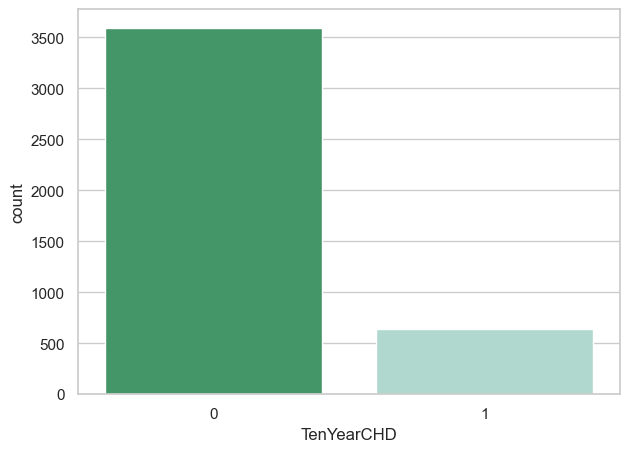

In [14]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()


## Fitting Logistic Regression Model for Heart Disease Prediction

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [16]:
yhat = Logestic.predict(X_test)
yhat

NameError: name 'Logestic' is not defined

## confusion matrix

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

NameError: name 'y_test' is not defined

log loss

In [17]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

NameError: name 'y_test' is not defined